# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [21]:
# Loading the data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('train.csv')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID            333 non-null int64
Crime Rate    333 non-null float64
Land          333 non-null float64
Industry      333 non-null float64
chas          333 non-null int64
nox           333 non-null float64
rm            333 non-null float64
age           333 non-null float64
dis           333 non-null float64
rad           333 non-null int64
tax           333 non-null int64
ptratio       333 non-null float64
black         333 non-null float64
lstat         333 non-null float64
medv          333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [3]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


Text(0, 0.5, 'Number of Houses')

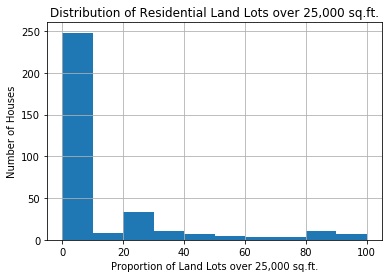

In [17]:
# Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
# Mearsure of Centrality (1) The Distribution of land lot size. 

df.zn.hist()
plt.title('Distribution of Residential Land Lots over 25,000 sq.ft.')
plt.xlabel('Proportion of Land Lots over 25,000 sq.ft.')
plt.ylabel('Number of Houses')


Skewed distribution showing the majority of houses with lot sizes below 10,000 sq.ft. 

Text(0, 0.5, 'Number of Houses')

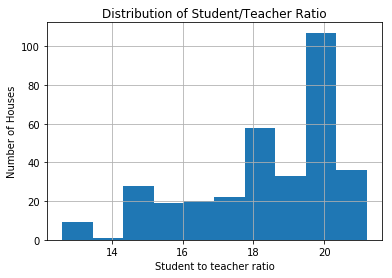

In [28]:
# Measure of Centrality (2) The Distribution of student to teacher ratios. 

df.ptratio.hist()
plt.title('Distribution of Student/Teacher Ratio')
plt.xlabel('Student to teacher ratio')
plt.ylabel('Number of Houses')

Skewed distribution showing the majority of houses with students in class sizes around 20 students per teacher.

Text(0, 0.5, 'Number of houses')

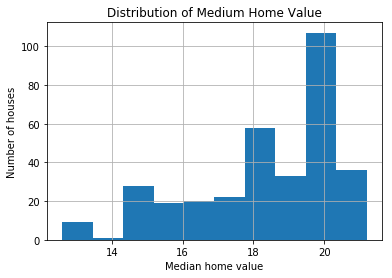

In [29]:
# Measure of Centrality (3) The Distribution of Home Values. 

df.ptratio.hist()
plt.title('Distribution of Medium Home Value')
plt.xlabel('Median home value')
plt.ylabel('Number of houses')

Skewed distribution with the mean home value around $200,000.

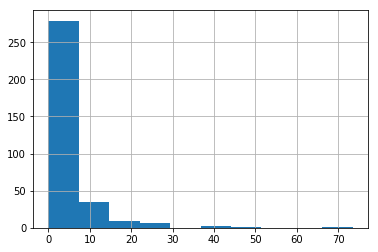

In [34]:
df.crim.hist()

In [36]:
# Measures of dispersion for per capita crime rate

df.crim.quantile(.5)

0.26169000000000003

In [37]:
df.crim.max()

73.5341

In [38]:
df.crim.std()

7.3522718367811075

In [49]:
# Subset #1 - Comparing housing value to it's location to the Charles River. This analysis questions whether the 
# value of a home will increase with it's proximity to the river. 

river_bound = df.loc[df['chas'] == 1]
river_bound.head()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,143,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
104,155,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
108,161,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
110,164,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
145,209,0.13587,0.0,10.59,1,0.489,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4


In [58]:
non_river_bound = df.loc[df['chas'] == 0]
non_river_bound.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,decades,river_bound,non_river_bound
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,6.0,True,False
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,7.0,True,False
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,4.0,True,False
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,5.0,True,False
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,6.0,True,False


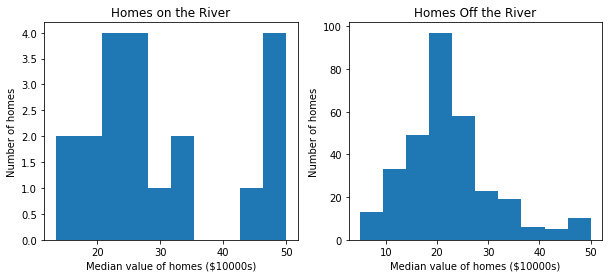

In [68]:
figure = plt.figure(figsize=(10,4))
ax = figure.add_subplot(121)
ax.hist(river_bound.medv)
ax.set_xlabel('Median value of homes ($10000s)')
ax.set_ylabel('Number of homes')
ax.set_title('Homes on the River')

ax2 = figure.add_subplot(122)
ax2.hist(non_river_bound.medv)
ax2.set_xlabel('Median value of homes ($10000s)')
ax2.set_ylabel('Number of homes')
ax2.set_title('Homes Off the River')

plt.show()

In [49]:
# Subset #2 - Comparing air quality of housing to it's proportion of industry acres. This analysis 
# questions whether the Nox concentrations (and therefore degredation of air quality) increase in areas where 
# there is more industry present. 

nox_rate = df.loc[:, ['nox', 'indus']]

nox_rate = nox_rate.sort_values(by=['indus'])
x = nox_rate.loc[:, 'nox']
y = nox_rate.loc[:, 'indus']


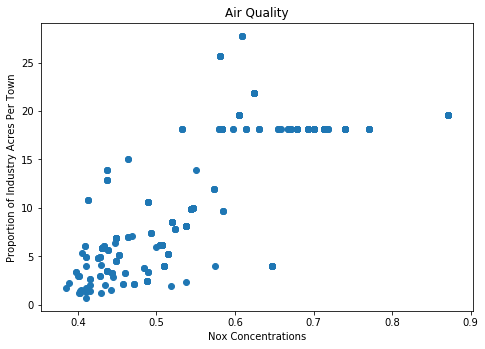

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(x,y)
ax.set_xlabel('Nox Concentrations')
ax.set_ylabel('Proportion of Industry Acres Per Town')
ax.set_title('Air Quality')
plt.show()

Analysis:

This graph shows that with more industry, generally comes higher concentrations of Nox and therefore, poorer air quality. The line of data points is interesting as it shows the same amount of industry in numerous housing areas, but increased Nox concentrations. This could be related to the type of industry in the area.

In [61]:
# Subset #3 - Comparing the amount of property tax paid to the student to teacher ratios in schools. Generally, 
# much of property tax goes towards school funding. One would hope that the more they pay in property tax, the  
# better off their school would be in the form of class size. 

teacher_tax = df.loc[:, ['tax', 'ptratio']]
teacher_tax = teacher_tax.sort_values(by=['tax'])

x = teacher_tax.loc[:, 'tax']
y = teacher_tax.loc[:, 'ptratio']


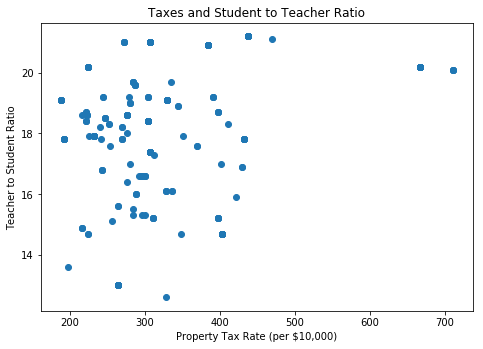

In [64]:

fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
ax.scatter(x,y)
ax.set_xlabel('Property Tax Rate (per $10,000)')
ax.set_ylabel('Teacher to Student Ratio')
ax.set_title('Taxes and Student to Teacher Ratio')
plt.show()


Analysis: 
    
There is no clear correlation between the amount you pay in taxes and the student to teacher ratio found in your town's schools. In a perfect system, the more money you are paying in property taxes, the better off your school system should be. One indicator of that would be smaller class sizes. However, the complications of school funding, classroom size, teacher salaries and educational programing does not allow this to be a direct correlation. 

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!